# America Company Bankrupt Prediction Artificial Neural Network (4)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install --upgrade scikit-learn

In [3]:
import keras
import pickle
from pyforest                      import *
from feature_engine.outliers       import Winsorizer

In [4]:
# library dibawah sebenarnya udah ada di pyforest
from sklearn.model_selection       import train_test_split
from sklearn.feature_selection     import SelectKBest, f_classif
from sklearn.preprocessing         import MinMaxScaler, StandardScaler
from sklearn.preprocessing         import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline              import make_pipeline
from sklearn.compose               import ColumnTransformer
from sklearn.metrics               import (f1_score,
                                           precision_score,
                                           recall_score,
                                           log_loss,
                                           accuracy_score,
                                           classification_report,
                                           ConfusionMatrixDisplay,
                                           confusion_matrix)


from sklearn.ensemble              import StackingClassifier
from sklearn.pipeline              import Pipeline
from sklearn.preprocessing         import StandardScaler
from sklearn_pandas                import DataFrameMapper
from sklearn.ensemble              import AdaBoostClassifier
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.linear_model          import LogisticRegression
from matplotlib.colors             import ListedColormap
from sklearn.linear_model          import SGDClassifier
from sklearn.ensemble              import RandomForestClassifier
from sklearn.linear_model          import SGDClassifier
from sklearn.svm                   import SVC
from sklearn.naive_bayes           import GaussianNB
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.neighbors             import NeighborhoodComponentsAnalysis
from keras.callbacks               import EarlyStopping
from keras.optimizers              import SGD
from tensorflow.keras.optimizers   import Adam

In [5]:
import tensorflow as tf #cek versi tensorflow
print(tf.__version__)

2.16.1


In [6]:
X               = pd.read_csv('C:/Users/ASUS/kode/Projek/bankrupt/X.csv')
y               = pd.read_csv('C:/Users/ASUS/kode/Projek/bankrupt/y.csv')
X_train         = pd.read_csv('C:/Users/ASUS/kode/Projek/bankrupt/data/X_train.csv')
X_train_balance = pd.read_csv('C:/Users/ASUS/kode/Projek/bankrupt/data/X_train_balance.csv')
X_test          = pd.read_csv('C:/Users/ASUS/kode/Projek/bankrupt/data/X_test.csv')
y_train         = pd.read_csv('C:/Users/ASUS/kode/Projek/bankrupt/data/y_train.csv')
y_train_balance = pd.read_csv('C:/Users/ASUS/kode/Projek/bankrupt/data/y_train_balance.csv')
y_test          = pd.read_csv('C:/Users/ASUS/kode/Projek/bankrupt/data/y_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
X

,year,aset_sekarang,biaya_barang_terjual,penyusutan_dan_amortisasi,laba_spbda,inventaris,pendapatan_bersih,total_piutang,nilai_pasar,total_aset,total_hutang_jangka_panjang,laba_kotor,total_kewajiban lancar,laba_tersisa
0,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,740.998,180.447,191.226,163.816,201.026
1,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,701.854,179.987,160.444,125.392,204.065
2,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,710.199,217.699,112.244,150.464,139.603
3,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,686.621,164.658,109.590,203.575,124.106
4,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,709.292,248.666,128.656,131.261,131.884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,756.4827,1099.101,184.666,60.885,28.197,28.095
78678,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,527.5750,1865.926,770.103,231.969,88.128,157.783
78679,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,578.8868,1746.235,683.985,100.784,85.765,156.341
78680,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,412.6241,1736.110,694.035,95.357,82.010,135.941


In [8]:
y

,bankrupt
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
78677,0.0
78678,0.0
78679,0.0
78680,0.0


In [9]:
print(y_train_balance.value_counts(normalize=True))

bankrupt
0.0         0.5
1.0         0.5
Name: proportion, dtype: float64


In [10]:
print(y_train.value_counts(normalize=True))

bankrupt
0.0         0.934233
1.0         0.065767
Name: proportion, dtype: float64


Penerapan dari teknik sampling/balancing data tersebut dengan menggunakan SMOTE dengan strategi 'auto' dapat membuat atau meningkatkan sampel sintesis dalam kelas minoritas yaitu 'bankrupt' = 1

In [11]:
X_train.shape

(59011, 14)

In [12]:
X_train_balance.shape

(110260, 14)

In [13]:
ccount = y_train_balance['bankrupt'].value_counts()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

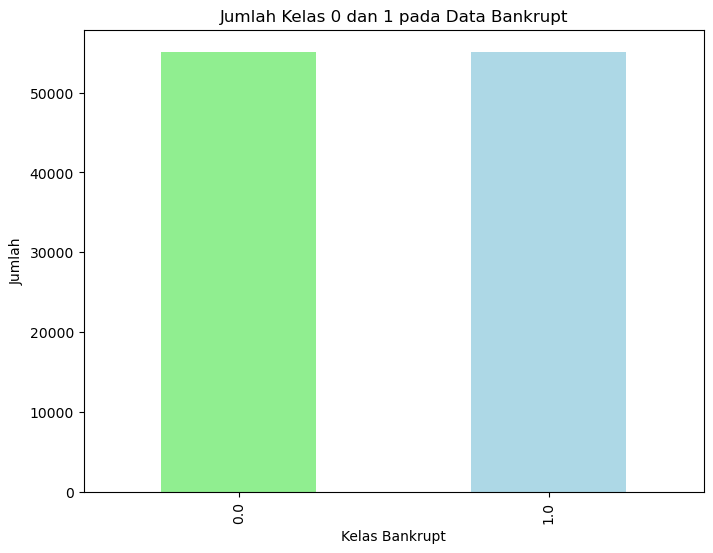

In [14]:
plt.figure(figsize=(8, 6))
ccount.plot(kind='bar', color=['lightgreen', 'lightblue'])
plt.title('Jumlah Kelas 0 dan 1 pada Data Bankrupt')
plt.xlabel('Kelas Bankrupt')
plt.ylabel('Jumlah')
plt.show()

## Neurall Network Modelling
fungsi untuk evaluasi nanti, kasus klasifikasi. menggunakan X_train_balance dan y_train_balance

Evaluasi dengan klasifikasi:
- accuracy
- precision
- recall (sensitivity)
- Specificity
- ROC-AUC
- Precision-Recall Curve and AUC
- F-beta score
- Matthews Correlation Coefficient
- Log loss

In [15]:
# y_true itu y_test
def model_report(y_true, y_pred):

    acc                     = accuracy_score(y_true, y_pred)
    pre                     = precision_score(y_true, y_pred)
    rec                     = recall_score(y_true, y_pred)
    f1                      = f1_score(y_true, y_pred)
    loss                    = log_loss(y_true, y_pred)

    print("accuracy:   {:3f}\nprecision:  {:3f}\nrecall:     {:3f}\nf1-score:   {:3f}\nloss:       {:3f}".
          format(acc, pre, rec, f1, loss))

In [16]:
# Fungsi Evaluasi Suatu Model dengan Confusion Matrix
def plot_confusion_matriks(y_true, y_pred):
    cm    = confusion_matrix(y_true, y_pred)
    tampil = ConfusionMatrixDisplay(confusion_matrix=cm)

    tampil.plot(cmap='Greys')

    plt.title('Confusion Matrix')
    plt.show()

### Neural Network

In [38]:
def pred_report_nn(y_true, y_pred):

    # Konversi prediksi yang kontinu menjadi nilai biner (0/1)
    y_pred_bin = np.round(y_pred).astype(int)

    # Hitung metrik evaluasi klasifikasi
    acc_ann    = accuracy_score(y_true, y_pred_bin)
    pre_ann    = precision_score(y_true, y_pred_bin)
    rec_ann    = recall_score(y_true, y_pred_bin)
    f1_ann     = f1_score(y_true, y_pred_bin)
    loss_ann   = log_loss(y_true, y_pred)

    print("Accuracy:  {:3f}\nPrecision:  {:3f}\nRecall:  {:3f}\nF1 Score:  {:3f}\nLoss:  {:3f}".
          format(acc_ann, pre_ann, rec_ann, f1_ann, loss_ann))

In [18]:
print(X_train_balance.shape)
print(X_test.shape)

(110260, 14)
(19671, 14)


In [19]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                               patience=10)

<IPython.core.display.Javascript object>

#### Split into val

In [20]:
X_train_balance, X_val_balance, y_train_balance, y_val_balance = train_test_split(X_train_balance,
                                                                                  y_train_balance,
                                                                                  test_size=0.2,
                                                                                  random_state=42)

In [21]:
ann_model2    = tf.keras.Sequential()

ann_model2.add(tf.keras.layers.Dense(units=64,
                                     activation="relu",
                                     input_shape=(14,)))
ann_model2.add(tf.keras.layers.Dropout(0.2))

ann_model2.add(tf.keras.layers.Dense(units=128,
                                     activation="relu"))
ann_model2.add(tf.keras.layers.Dropout(0.2))

ann_model2.add(tf.keras.layers.Dense(units=64,
                                     activation="relu"))
ann_model2.add(tf.keras.layers.Dropout(0.2))

ann_model2.add(tf.keras.layers.Dense(units=1,
                                     activation="sigmoid"))

ann_model2.compile(optimizer=Adam(learning_rate=0.001),
                   loss="binary_crossentropy", #dua kategori
                   metrics=["accuracy"])

In [22]:
ann_model2.fit(X_train_balance,
               y_train_balance,
               epochs=50,
               batch_size=128,
               validation_data=(X_val_balance, y_val_balance),
               callbacks=[early_stopping],
               verbose=2)

Epoch 1/50
690/690 - 7s - 11ms/step - accuracy: 0.5352 - loss: 11.8121 - val_accuracy: 0.5303 - val_loss: 0.6847
Epoch 2/50
690/690 - 4s - 5ms/step - accuracy: 0.5328 - loss: 0.8091 - val_accuracy: 0.5389 - val_loss: 0.6800
Epoch 3/50
690/690 - 4s - 6ms/step - accuracy: 0.5313 - loss: 0.7273 - val_accuracy: 0.5049 - val_loss: 0.6915
Epoch 4/50
690/690 - 4s - 6ms/step - accuracy: 0.5367 - loss: 0.6929 - val_accuracy: 0.5394 - val_loss: 0.6775
Epoch 5/50
690/690 - 4s - 5ms/step - accuracy: 0.5475 - loss: 0.6930 - val_accuracy: 0.5463 - val_loss: 0.6789
Epoch 6/50
690/690 - 3s - 5ms/step - accuracy: 0.5490 - loss: 0.6879 - val_accuracy: 0.5948 - val_loss: 0.6648
Epoch 7/50
690/690 - 4s - 5ms/step - accuracy: 0.5599 - loss: 0.6844 - val_accuracy: 0.5890 - val_loss: 0.6681
Epoch 8/50
690/690 - 3s - 5ms/step - accuracy: 0.5561 - loss: 0.6794 - val_accuracy: 0.5844 - val_loss: 0.6647
Epoch 9/50
690/690 - 5s - 8ms/step - accuracy: 0.5633 - loss: 0.6805 - val_accuracy: 0.5514 - val_loss: 0.6792

#### Learning Rate Scheduler atau setiap beberapa epoch akan dikecilin learning ratenya

In [23]:
from tensorflow.keras.callbacks import LearningRateScheduler

def learning_rate_scheduler(epoch, lr):
    
    if epoch % 10 == 0 and epoch != 0:
        lr = lr * 0.1
        
    return lr

In [24]:
lr_schedul = LearningRateScheduler(learning_rate_scheduler)

In [25]:
ann_model2.fit(X_train_balance,
               y_train_balance,
               epochs=100,
               batch_size=128,
               validation_data=(X_val_balance, y_val_balance),
               callbacks=[lr_schedul, early_stopping],
               verbose=2)

Epoch 1/100
690/690 - 5s - 8ms/step - accuracy: 0.7167 - loss: 0.5454 - val_accuracy: 0.7387 - val_loss: 0.5162 - learning_rate: 0.0010
Epoch 2/100
690/690 - 9s - 13ms/step - accuracy: 0.7178 - loss: 0.5427 - val_accuracy: 0.7350 - val_loss: 0.5187 - learning_rate: 0.0010
Epoch 3/100
690/690 - 4s - 6ms/step - accuracy: 0.7187 - loss: 0.5427 - val_accuracy: 0.7456 - val_loss: 0.5105 - learning_rate: 0.0010
Epoch 4/100
690/690 - 3s - 5ms/step - accuracy: 0.7185 - loss: 0.5418 - val_accuracy: 0.7506 - val_loss: 0.5073 - learning_rate: 0.0010
Epoch 5/100
690/690 - 3s - 5ms/step - accuracy: 0.7230 - loss: 0.5385 - val_accuracy: 0.7532 - val_loss: 0.5033 - learning_rate: 0.0010
Epoch 6/100
690/690 - 3s - 5ms/step - accuracy: 0.7201 - loss: 0.5392 - val_accuracy: 0.7332 - val_loss: 0.5171 - learning_rate: 0.0010
Epoch 7/100
690/690 - 3s - 5ms/step - accuracy: 0.7256 - loss: 0.5335 - val_accuracy: 0.7451 - val_loss: 0.5084 - learning_rate: 0.0010
Epoch 8/100
690/690 - 3s - 5ms/step - accuracy:

In [34]:
def viz_hasil_nn(ann_model):
    # Mendapatkan riwayat pelatihan dari model
    history = ann_model.history
    
    # Membuat plot untuk akurasi
    plt.figure(figsize=(12, 6))
    plt.plot(history.history["accuracy"], label="Model Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Model Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Membuat plot untuk loss
    plt.figure(figsize=(12, 6))
    plt.plot(history.history["loss"], label="Model Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Model Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

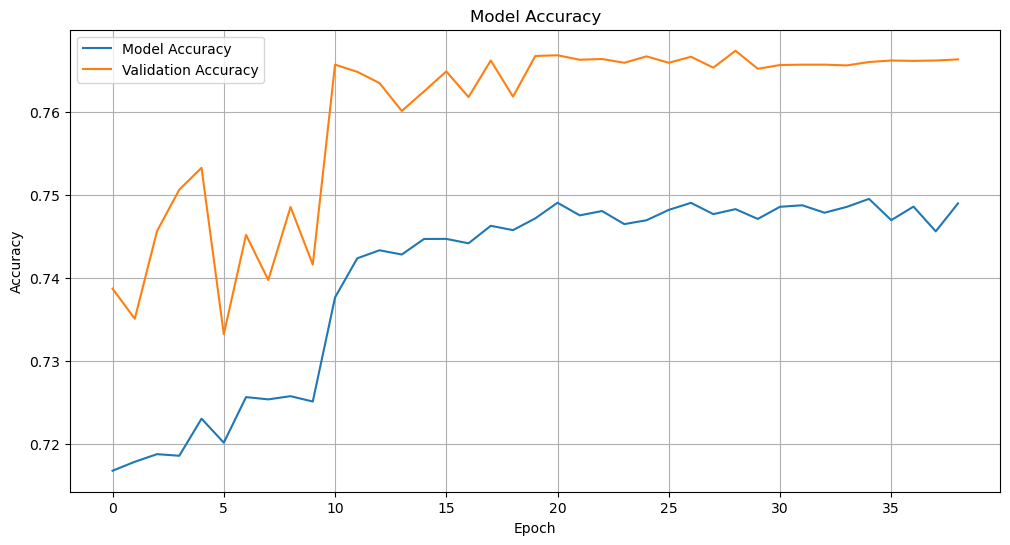

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

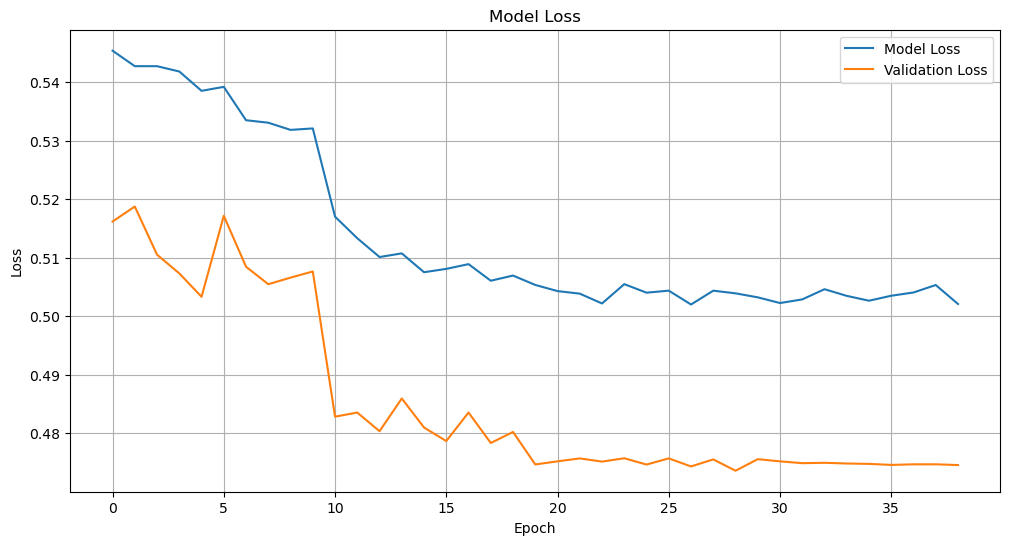

In [35]:
viz_hasil_nn(ann_model2)

In [39]:
print("Hasil Evaluasi Model terhadap Prediksi data test menggunakan NN:")
pred_report_nn(y_test, ann_model2.predict(X_test, verbose=0))

Hasil Evaluasi Model terhadap Prediksi data test menggunakan NN:


<IPython.core.display.Javascript object>

Accuracy:  0.625032
Precision:  0.133455
Recall:  0.820762
F1 Score:  0.229580
Loss:  0.567785


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

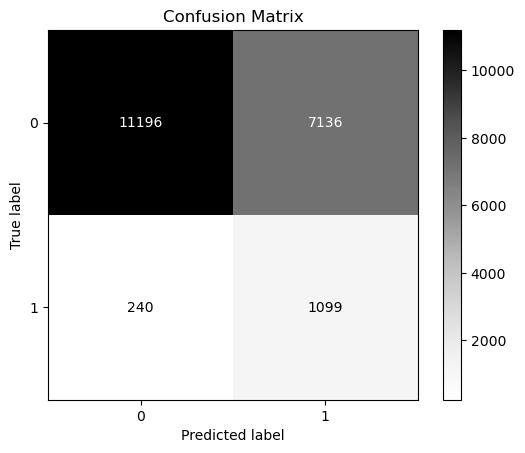

In [40]:
plot_confusion_matriks(y_test, np.round(ann_model2.predict(X_test, verbose=0)))

#### NN Conclusion
Model neural network yang dilatih menunjukkan peningkatan performa yang signifikan setelah penyesuaian learning rate setiap 10 epoch. Pada epoch awal, model mulai dengan learning rate 0.001, menghasilkan peningkatan akurasi bertahap namun konsisten. Setelah epoch ke-10, learning rate diturunkan menjadi 0.0001, yang menyebabkan peningkatan lebih stabil dan akurasi validasi yang lebih baik, mencapai sekitar 78.5% pada akhir pelatihan. Penurunan learning rate lebih lanjut hingga 0.00001 dan akhirnya 0.000001 membantu model mencapai konvergensi yang lebih halus, mengurangi overfitting, dan menjaga val_loss sekitar 0.4537 yang menunjukkan model yang cukup stabil dan tidak overfitting pada data validasi. Penerapan dari LearningRateScheduler berhasil meningkatkan performa model secara keseluruhan, menunjukkan bahwa penyesuaian dinamis learning rate dapat membantu dalam mencapai model yang lebih generalizable dan efektif.

In [26]:
ann_model2.save('C:/Users/ASUS/kode/Projek/bankrupt/Neural Network.keras')